In [4]:
from pymongo import MongoClient
import sys
sys.path.append('/Users/bogao/Desktop/projects/Relative copy number/Python/mecan')
import mecan4cna.algorithms as alg
import mecan4cna.common as comm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
db = MongoClient()['pcawg']['samples']
m = alg.mecan()

samples = []
data = {}
for sample in db.find():
    if 'Normal' not in sample['sample_type']:
        samples.append(sample)
        

1896

In [7]:
for sample in samples:
    res = m.run(sample['segments'])
    if len(res) >1:
        base = res[0]
        thresh = res[1]
        data[sample['sample_id']] = {'project':sample['project_code'], 'base':base,'thresh':thresh}

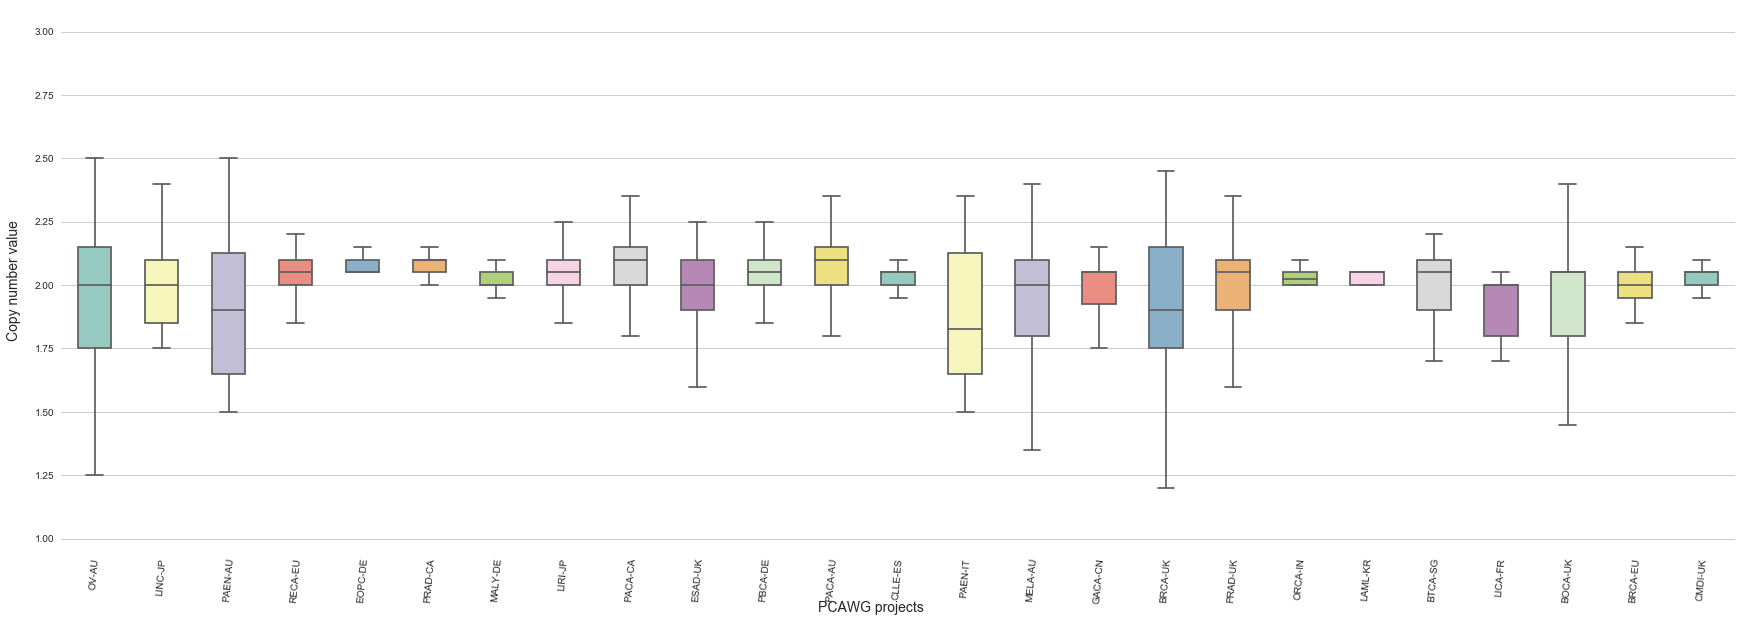

In [25]:
# dd = pd.DataFrame(data.items(), columns=['project','base','thresh'])
dd = pd.DataFrame.from_dict(data, orient='index')
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot('project','base', data=dd,palette="Set3", fliersize=0, width=0.5)
sns.despine(left=True, bottom=True)
# ax.set(ylim=(1.5, 2.5))
plt.xticks(rotation=85)
f.text(0.5, 0.04, 'PCAWG projects', ha='center', fontsize=14)
f.text(0.1, 0.5, 'Copy number value', va='center', rotation='vertical', fontsize=14)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

In [22]:
dd = pd.DataFrame.from_dict(data, orient='index')

In [26]:
for k,v in data.items():
    db.find_one_and_update({'sample_id': k},
                           {'$set': {'base': v['base'], 'thresh':v['thresh']}})